In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
awn_2 = pd.read_csv('C:/Users/raclo/Documents/Bootcamp/Project 2/Sprint 3/all_wines_encoded.csv')
awn_2.head()

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_label,wine_type
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,0
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,0
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,0
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1,0
4,4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0,0


In [4]:
awn_2.shape

(5320, 14)

In [5]:
awn_2.drop(columns=["Unnamed: 0"], inplace=True)

In [6]:
awn_2.drop(columns=["residual sugar"], inplace=True)

In [7]:
awn_2.head()

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_label,wine_type
0,7.4,0.70,0.00,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,0
1,7.8,0.88,0.00,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,0
2,7.8,0.76,0.04,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,0
3,11.2,0.28,0.56,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1,0
4,7.4,0.66,0.00,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0,0


In [8]:
print(awn_2.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides',
       'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH',
       'sulphates', 'alcohol', 'quality_label', 'wine_type'],
      dtype='object')


In [9]:
# split data
from sklearn.model_selection import train_test_split

X = awn_2.drop('quality_label', axis=1)
y = awn_2['quality_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=420)

In [10]:
# data normalisation with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing data
X_test_norm = norm.transform(X_test)

In [11]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# define model
LR_model = LogisticRegression(max_iter=15000)
# fit model
LR_model.fit(X_train_norm, y_train)
# make predictions
LR_preds = LR_model.predict(X_test_norm)

In [12]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
# define model
RF_clf = RandomForestClassifier(class_weight='balanced',
                                n_estimators=500,
                                min_samples_split=5, 
                                min_samples_leaf=2, 
                                max_depth=None, 
                                random_state=42)
# fit model
RF_clf.fit(X_train_norm, y_train)
# make predictions
RF_preds = RF_clf.predict(X_test_norm)

In [13]:
# from sklearn.model_selection import RandomizedSearchCV
# param_dist = {
#     'n_estimators': [100, 200, 500],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5],
#     'min_samples_leaf': [1, 2]
# }
# random_search = RandomizedSearchCV(RandomForestClassifier(), param_dist, n_iter=10, cv=5, n_jobs=-1)
# random_search.fit(X_train, y_train)
# print("Best Parameters:", random_search.best_params_)

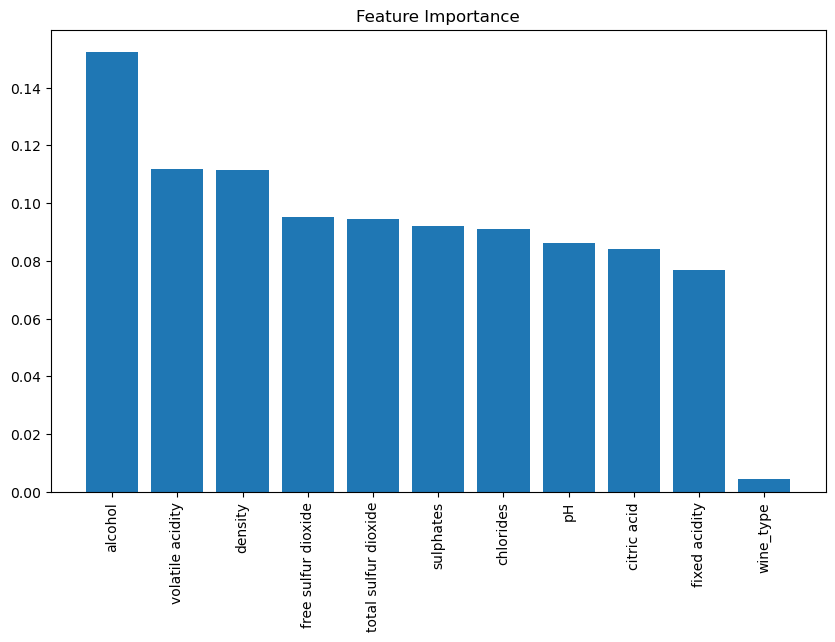

In [14]:
import matplotlib.pyplot as plt
import numpy as np

rf = RandomForestClassifier().fit(X_train, y_train)
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.title('Feature Importance')
plt.show()

In [15]:
# BernoulliNB
from sklearn.naive_bayes import BernoulliNB
# define model
BER_clf = BernoulliNB()
# fit model
BER_clf.fit(X_train_norm, y_train)
# make predictions
BER_preds = BER_clf.predict(X_test_norm)

In [16]:
# DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# define model
DTC_clf = DecisionTreeClassifier(random_state=42)
# fit model
DTC_clf.fit(X_train_norm, y_train)
# make predictions
DTC_preds = DTC_clf.predict(X_test_norm)

In [17]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'max_depth': [None, 5, 10, 15],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 5],
#     'max_features': [None, 'sqrt', 'log2'],
#     'criterion': ['gini', 'entropy']
# }

# grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1)
# grid_search.fit(X_train, y_train)

# print("Best Parameters:", grid_search.best_params_)

In [18]:
# Support Vector Classifier
from sklearn.svm import SVC
# define model
SVC_clf = SVC(kernel='rbf', C=1, gamma='scale')
# fit model
SVC_clf.fit(X_train_norm, y_train)
# make predictions
SVC_preds = SVC_clf.predict(X_test_norm)

In [19]:
from sklearn.metrics import accuracy_score 

# check overall accuracy %
LR_acc = accuracy_score(y_test, LR_preds)
RF_acc = accuracy_score(y_test, RF_preds)
BER_acc = accuracy_score(y_test, BER_preds)
DTC_acc = accuracy_score(y_test, DTC_preds)
SVC_acc = accuracy_score(y_test, SVC_preds)

print("Logistic Regression: ", LR_acc, "\nRandom Forest: ", RF_acc, "\nBernoulliNB: ", 
      BER_acc, "\nDecisionTreeClassifier :",DTC_acc, "\nSupport Vector Classifier: ",SVC_acc)


Logistic Regression:  0.7236842105263158 
Random Forest:  0.7669172932330827 
BernoulliNB:  0.5968045112781954 
DecisionTreeClassifier : 0.6325187969924813 
Support Vector Classifier:  0.7471804511278195


# Evaluation Metrics

## Confusion Matrix

In [20]:
from sklearn.metrics import confusion_matrix

cm_LR = confusion_matrix(y_test, LR_preds)
cm_RF = confusion_matrix(y_test, RF_preds)
cm_BER = confusion_matrix(y_test, BER_preds)
cm_DTC = confusion_matrix(y_test, DTC_preds)
cm_SVC = confusion_matrix(y_test, SVC_preds)
cm_LR

array([[237, 169,   0],
       [100, 533,   0],
       [  0,  25,   0]], dtype=int64)

In [21]:
cm_RF

array([[274, 132,   0],
       [ 92, 541,   0],
       [  0,  24,   1]], dtype=int64)

In [22]:
cm_BER 

array([[ 14, 392,   0],
       [ 12, 621,   0],
       [  0,  25,   0]], dtype=int64)

In [23]:
cm_DTC

array([[230, 172,   4],
       [164, 436,  33],
       [  1,  17,   7]], dtype=int64)

In [24]:
cm_SVC

array([[249, 157,   0],
       [ 87, 546,   0],
       [  0,  25,   0]], dtype=int64)

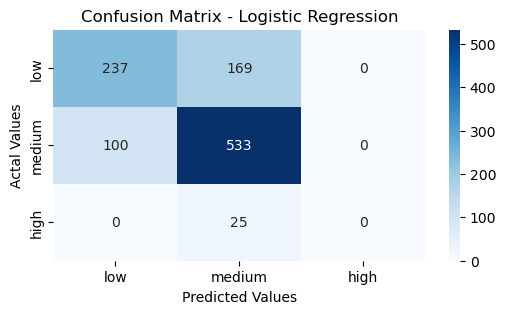

In [25]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_LR_awn_2 = pd.DataFrame(cm_LR,
                    index = ['low','medium','high'], 
                    columns = ['low','medium','high'])

#Plotting the 3x3 confusion matrix
plt.figure(figsize=(6,3))
sns.heatmap(cm_LR_awn_2, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

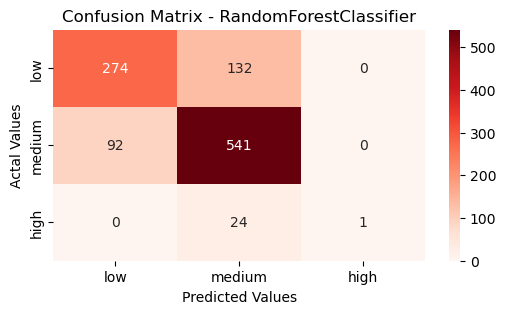

In [26]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_LR_awn_2 = pd.DataFrame(cm_RF,
                    index = ['low','medium','high'], 
                    columns = ['low','medium','high'])

#Plotting the 3x3 confusion matrix
plt.figure(figsize=(6,3))
sns.heatmap(cm_LR_awn_2, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix - RandomForestClassifier')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

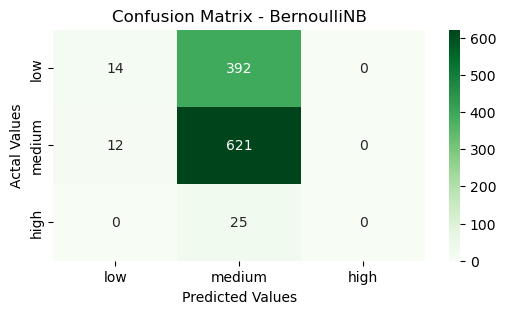

In [27]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_LR_awn_2 = pd.DataFrame(cm_BER,
                    index = ['low','medium','high'], 
                    columns = ['low','medium','high'])

#Plotting the 3x3 confusion matrix
plt.figure(figsize=(6,3))
sns.heatmap(cm_LR_awn_2, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - BernoulliNB')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

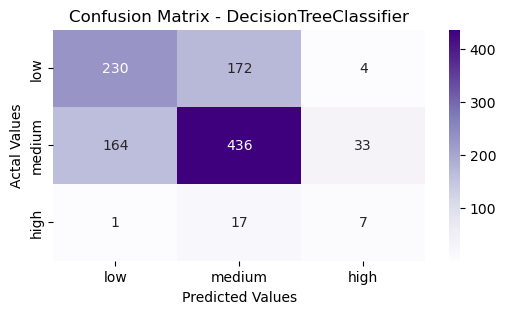

In [28]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_LR_awn_2 = pd.DataFrame(cm_DTC,
                    index = ['low','medium','high'], 
                    columns = ['low','medium','high'])

#Plotting the 3x3 confusion matrix
plt.figure(figsize=(6,3))
sns.heatmap(cm_LR_awn_2, annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix - DecisionTreeClassifier')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

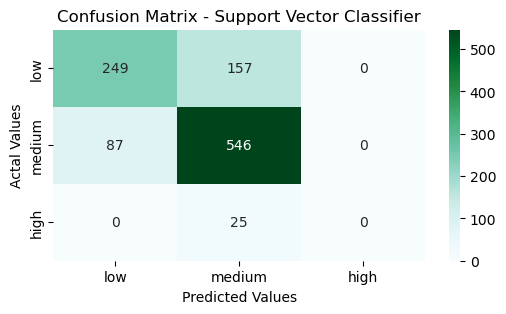

In [29]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_LR_awn_2 = pd.DataFrame(cm_SVC,
                    index = ['low','medium','high'], 
                    columns = ['low','medium','high'])

#Plotting the 3x3 confusion matrix
plt.figure(figsize=(6,3))
sns.heatmap(cm_LR_awn_2, annot=True, fmt='d', cmap='BuGn')
plt.title('Confusion Matrix - Support Vector Classifier')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

## Classification Report

In [30]:
from sklearn.metrics import classification_report
# print(classification_report(y_test, LR_preds))
# Logistic Regression

report = classification_report(y_test, LR_preds, zero_division=0)
print(report)

              precision    recall  f1-score   support

           0       0.70      0.58      0.64       406
           1       0.73      0.84      0.78       633
           2       0.00      0.00      0.00        25

    accuracy                           0.72      1064
   macro avg       0.48      0.48      0.47      1064
weighted avg       0.70      0.72      0.71      1064



In [31]:
# Classification Report - Random Forest
report = classification_report(y_test, RF_preds, zero_division=0)
print(report)

              precision    recall  f1-score   support

           0       0.75      0.67      0.71       406
           1       0.78      0.85      0.81       633
           2       1.00      0.04      0.08        25

    accuracy                           0.77      1064
   macro avg       0.84      0.52      0.53      1064
weighted avg       0.77      0.77      0.76      1064



In [32]:
# Classification Report - BernoulliNB
report = classification_report(y_test, BER_preds, zero_division=0)
print(report)

              precision    recall  f1-score   support

           0       0.54      0.03      0.06       406
           1       0.60      0.98      0.74       633
           2       0.00      0.00      0.00        25

    accuracy                           0.60      1064
   macro avg       0.38      0.34      0.27      1064
weighted avg       0.56      0.60      0.47      1064



In [33]:
# Classification Report - BernoulliNB
report = classification_report(y_test, BER_preds, zero_division=0)
print(report)

              precision    recall  f1-score   support

           0       0.54      0.03      0.06       406
           1       0.60      0.98      0.74       633
           2       0.00      0.00      0.00        25

    accuracy                           0.60      1064
   macro avg       0.38      0.34      0.27      1064
weighted avg       0.56      0.60      0.47      1064



In [34]:
# Classification Report - DecisionTreeClassifier
report = classification_report(y_test, DTC_preds, zero_division=0)
print(report)

              precision    recall  f1-score   support

           0       0.58      0.57      0.57       406
           1       0.70      0.69      0.69       633
           2       0.16      0.28      0.20        25

    accuracy                           0.63      1064
   macro avg       0.48      0.51      0.49      1064
weighted avg       0.64      0.63      0.64      1064



In [35]:
# Classification Report - Support Vector Classifier
report = classification_report(y_test, SVC_preds, zero_division=0)
print(report)

              precision    recall  f1-score   support

           0       0.74      0.61      0.67       406
           1       0.75      0.86      0.80       633
           2       0.00      0.00      0.00        25

    accuracy                           0.75      1064
   macro avg       0.50      0.49      0.49      1064
weighted avg       0.73      0.75      0.73      1064



## Cohen's Kappa Coefficient

In [36]:
# Result for Logistic Regression
from sklearn.metrics import cohen_kappa_score
print(f'Logistic Regression:',cohen_kappa_score(y_test, LR_preds))
print(f'RandomForestClassifier:',cohen_kappa_score(y_test, RF_preds))
print(f'BernoulliNB:',cohen_kappa_score(y_test, BER_preds))
print(f'DecisionTreeClassifier:',cohen_kappa_score(y_test, DTC_preds))
print(f'Support Vector Classifier:',cohen_kappa_score(y_test, SVC_preds))

Logistic Regression: 0.415387893093221
RandomForestClassifier: 0.513397286242748
BernoulliNB: 0.017287926869701153
DecisionTreeClassifier: 0.2764812582934638
Support Vector Classifier: 0.46487278818971833


# Evaluation Actions

## Data Normalization

In [37]:
X_test.head()

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_type
4051,6.6,0.20,0.14,0.184,35.0,168.0,0.99396,2.93,0.45,9.4,1
1682,7.5,0.35,0.28,0.051,26.0,157.0,0.99690,3.12,0.53,9.2,1
552,9.6,0.88,0.28,0.086,30.0,147.0,0.99790,3.24,0.53,9.4,0
4185,5.6,0.34,0.30,0.038,23.0,89.0,0.99266,3.25,0.49,11.1,1
3793,8.1,0.12,0.38,0.034,36.0,86.0,0.99026,2.80,0.55,12.0,1


In [38]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()

# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.fit_transform(X_test)

# pd.DataFrame(X_test_scaled, columns=X_test.columns).head()

In [39]:
# # Logistic Regression
# from sklearn.linear_model import LogisticRegression
# # define model
# LR_model = LogisticRegression(max_iter=15000)
# # fit model
# LR_model.fit(X_train_scaled, y_train)
# # make predictions
# LR_preds_2 = LR_model.predict(X_test_scaled)

In [40]:
# from sklearn.metrics import accuracy_score 

# # check overall accuracy %
# LR_acc_2 = accuracy_score(y_test, LR_preds_2)

# print("Logistic Regression: ", LR_acc_2)


## SMOTE 


In [41]:
from imblearn.over_sampling import SMOTE
from collections import Counter

counter = Counter(y_train)
print('Before', counter)

# oversampling the train dataset using SMOTE
smt = SMOTE()
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

counter = Counter(y_train_sm)
print('After', counter)

Before Counter({1: 2546, 0: 1582, 2: 128})
After Counter({1: 2546, 0: 2546, 2: 2546})


In [42]:
# Import necessary libraries
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from collections import Counter

# Apply SMOTETomek to address class imbalance
smtom = SMOTETomek(random_state=139)
X_train_smtom, y_train_smtom = smtom.fit_resample(X_train, y_train)

# Check class distribution after SMOTETomek
counter = Counter(y_train_smtom)
print('After SMOTETomek:', counter)

# Normalize the data
scaler = MinMaxScaler()
X_train_smtom_scaled = scaler.fit_transform(X_train_smtom)  # Fit on resampled training set
X_test_scaled = scaler.transform(X_test)  # Transform the test set

# Logistic Regression
LR_model = LogisticRegression(max_iter=15000)

# Fit model on normalized resampled training data
LR_model.fit(X_train_smtom_scaled, y_train_smtom)

# Make predictions on normalized test data
LR_preds_smtom = LR_model.predict(X_test_scaled)

After SMOTETomek: Counter({2: 2463, 0: 2284, 1: 2237})


In [43]:
from sklearn.metrics import accuracy_score 

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, LR_preds_smtom))

print("\nClassification Report:")
print(classification_report(y_test, LR_preds_smtom))



Confusion Matrix:
[[300  86  20]
 [164 234 235]
 [  1   2  22]]

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.74      0.69       406
           1       0.73      0.37      0.49       633
           2       0.08      0.88      0.15        25

    accuracy                           0.52      1064
   macro avg       0.48      0.66      0.44      1064
weighted avg       0.68      0.52      0.56      1064

